In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn
import scipy.stats as stt
from statsmodels.stats import proportion
seaborn.set(font_scale=1.5,style='ticks')
import os
import re
import sys
import itertools
import networkx as nx

clrs = seaborn.color_palette()
sys.path.append("/Users/Yves/Documents/Code/line_loop/packages/")

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import mouse_poker as mpk

In [3]:
poke_pos = [  [149,0],
         [68,19],[231,19],
       [0,62],[149,62],[298,62],
         [68,105],[231,105],
              [149,124]]

In [23]:
ROOT = "/Users/Yves/Documents/behavior_data/line_loop_cohort_3/"
#ROOT = '/Users/Yves/Documents/behavior_data/line_loop_cohort_2/'
#all_df  = mpk.load.create_base_df(ROOT,rerun=True)
all_df = mpk.load.load_df(ROOT)

In [24]:
good_df = all_df

In [25]:
date = np.unique(all_df['date'])[-2]
print(date)

2020-11-30T00:00:00.000000000


In [26]:
#date = sorted(good_df['date'])[-1]

In [27]:
print(date)

2020-11-30T00:00:00.000000000


In [28]:

#date = '2020/02/27'
day_df = good_df.loc[good_df['date']==date]



In [29]:
def sort_by_an(txt):
    animal = re.findall(r"'.*'",txt)[0]

    return float(animal[1:-1].replace('_','').replace("None",'0'))

ValueError: num must be 1 <= num <= 12, not 13

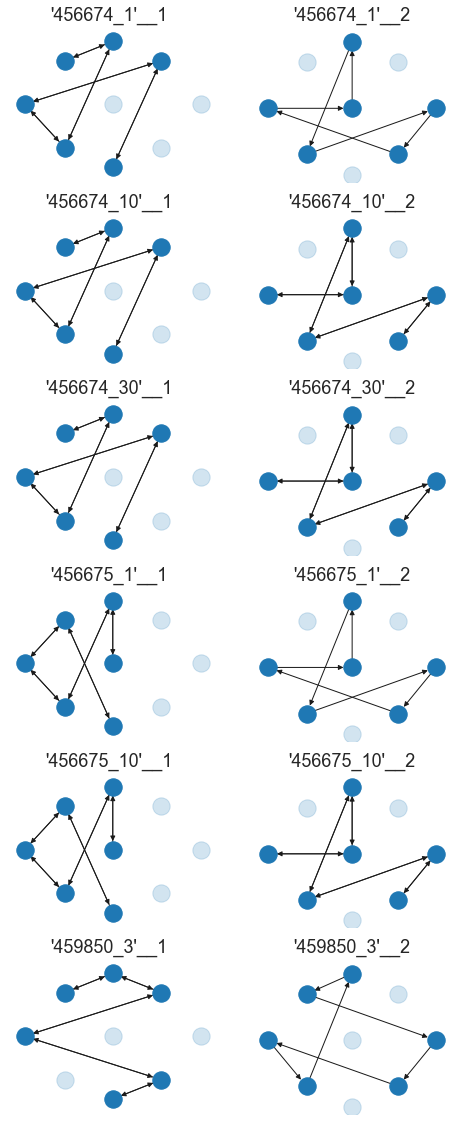

In [34]:
add = []
drawn = []

plt.figure(figsize=(8,20))
ijkk = 0
for kk,fpath in enumerate(sorted(day_df['filepath'])):
    f = open(fpath,'r')
    lines = f.readlines()
    dat_dict,events,event_times,nRews,_ = mpk.load.parse_data(lines,None)
    add.append(dat_dict)
    
    edges = []
    for ctr,i in enumerate(dat_dict['port']):
        ##if None not in i[1]:
        #for j in i[1]:
            #if j is not None and not dat_dict['random'][ctr]:
                if [i[0],i[1]] not in edges: edges.append([i[0],i[1]])

    
    animal = re.findall(r"'.*'",fpath)[0]
    task_nr = [re.findall('task_nr ([0-9])',i)[0] for i in lines if re.findall('task_nr ([0-9])',i)][0]
    if 'v2' in lines[1]:
        nStates =  [re.findall('nStates (\[.*\])',i)[0] for i in lines if re.findall('nStates (\[.*\])',i)][0]
        if nStates=='[6,6]':
            if True:#(('None' not in animal) and ('33' not in animal) and ('3' not in animal)) or ('850_3' in animal) or ('850_None' in animal) or ('30' in animal):
                if animal+ '__' + task_nr not in drawn:
                    plt.subplot(6,2,ijkk+1)
                    plt.title(animal+ '__' + task_nr)
                    G0 = nx.DiGraph()
                    G0.add_nodes_from(range(9),pos=np.array([1,-1])*poke_pos)
                    nx.draw(G0,pos=np.array([1,-1])*poke_pos,alpha=.2)
                    G = nx.DiGraph()
                    G.add_edges_from([i for i in edges if None not in i])
                    nx.draw(G,
                        pos=np.array([1,-1])*poke_pos,)
                    drawn.append(animal+ '__' + task_nr)
                    ijkk += 1
plt.tight_layout()

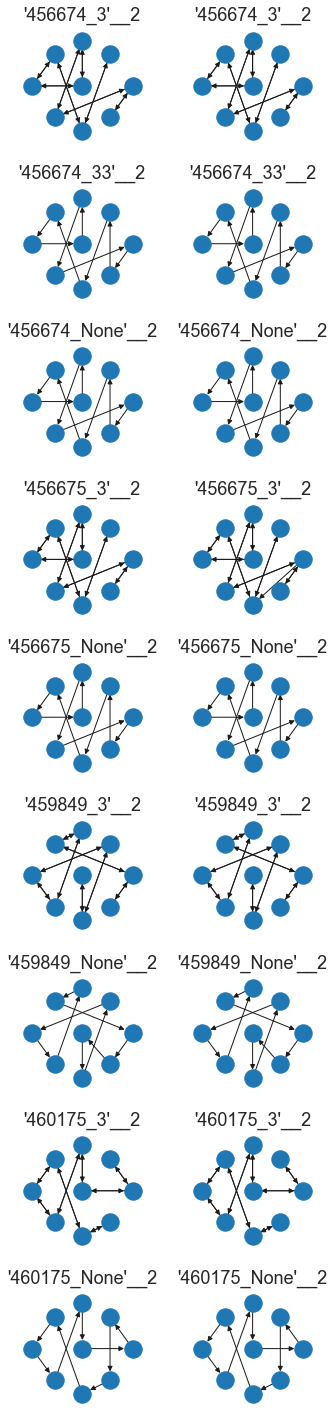

In [270]:
add = []
drawn = []

plt.figure(figsize=(5,20))
ijkk = 0
for kk,fpath in enumerate(sorted(day_df['filepath'])):
    f = open(fpath,'r')
    lines = f.readlines()
    dat_dict,events,event_times,nRews = mpk.load.parse_data(lines,None)
    add.append(dat_dict)
    
    edges = []
    for ctr,i in enumerate(dat_dict['port']):
        ##if None not in i[1]:
        #for j in i[1]:
            #if j is not None and not dat_dict['random'][ctr]:
                if [i[0],i[1]] not in edges: edges.append([i[0],i[1]])

    
    animal = re.findall(r"'.*'",fpath)[0]
    task_nr = [re.findall('task_nr ([0-9])',i)[0] for i in lines if re.findall('task_nr ([0-9])',i)][0]
    if 'v2' not in lines[1]:
        #nStates =  [re.findall('nStates (\[.*\])',i)[0] for i in lines if re.findall('nStates (\[.*\])',i)][0]
        #if nStates=='[6,6]':
        #if (('None' not in animal) and ('33' not in animal) and ('3' not in animal)) or ('850_3' in animal) or ('850_None' in animal) or ('30' in animal):
        #if animal+ '__' + task_nr not in drawn:
        plt.subplot(9,2,ijkk+1)
        plt.title(animal+ '__' + task_nr)
        G0 = nx.DiGraph()
        G0.add_nodes_from(range(9),pos=np.array([1,-1])*poke_pos)
        nx.draw(G0,pos=np.array([1,-1])*poke_pos,alpha=.2)
        G = nx.DiGraph()
        G.add_edges_from([i for i in edges if None not in i])
        nx.draw(G,
            pos=np.array([1,-1])*poke_pos,)
        drawn.append(animal+ '__' + task_nr)
        ijkk += 1
plt.tight_layout()

In [203]:
nStates

'[6,6]'

In [18]:
edges = []
for ctr,i in enumerate(dat_dict['port']):
    #if None not in i[1]:
    for j in i[1]:
        if j is not None and not dat_dict['random'][ctr]:
            if [i[0],j] not in edges: edges.append([i[0],j])


/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


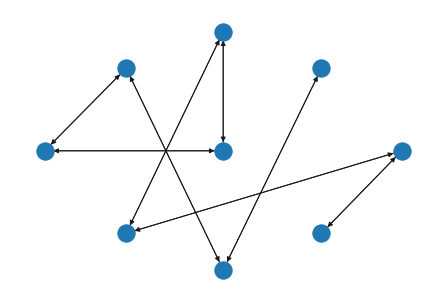

In [19]:
    G = nx.DiGraph()
    G.add_edges_from([i for i in edges if None not in i])
    nx.draw(G,
    pos=np.array([1,-1])*poke_pos)
